# Gaussian Mixture Models On Iris Dataset

## Step 1: Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd

# Load the Iris dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/Iris.csv'  # Replace with your file path
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Preprocessing and Cleaning

In [3]:

# Checking for missing values
missing_values = iris_data.isnull().sum()

# Dropping the 'Id' column
iris_data = iris_data.drop(columns=['Id'])

missing_values


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 3: Exploratory Data Analysis and Visualization

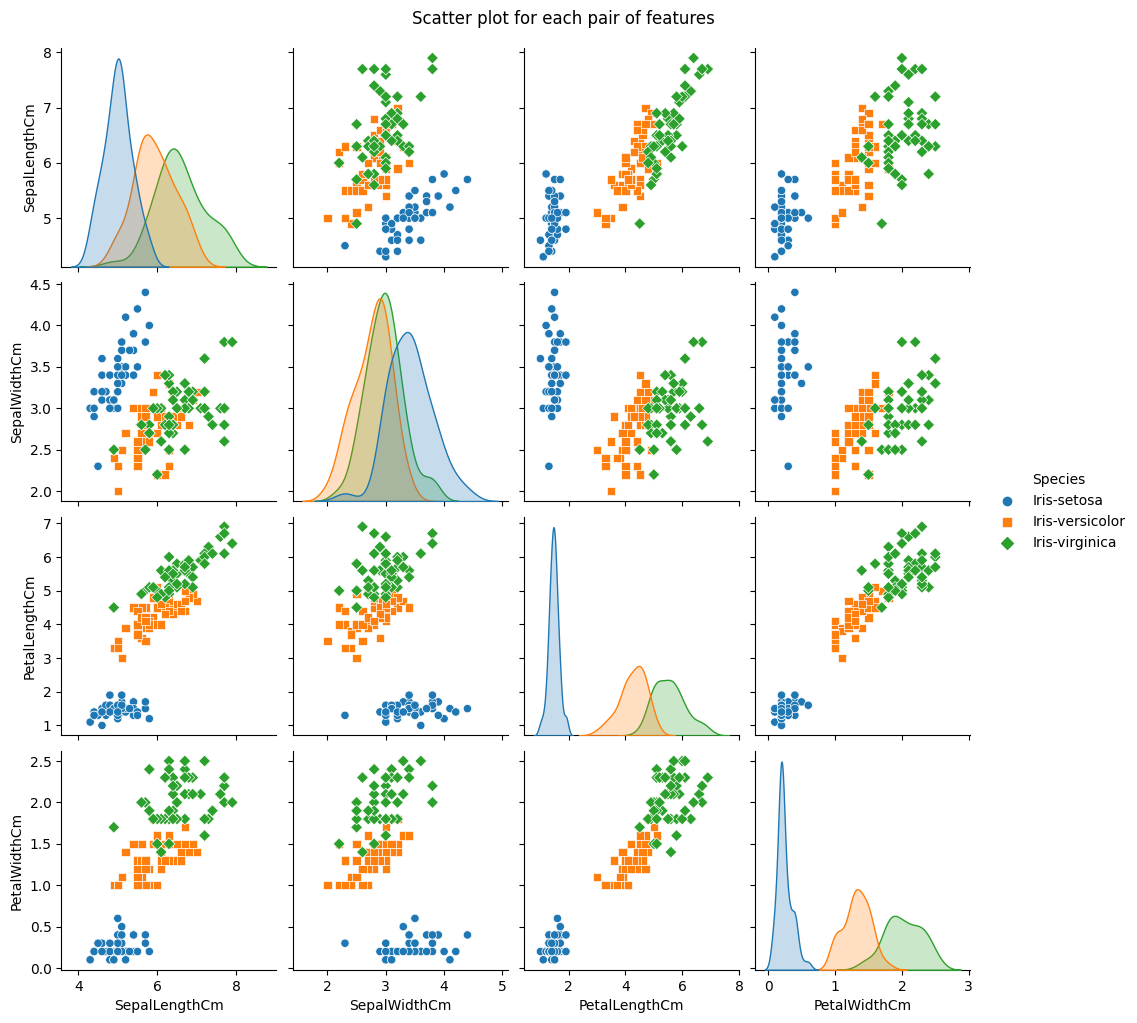

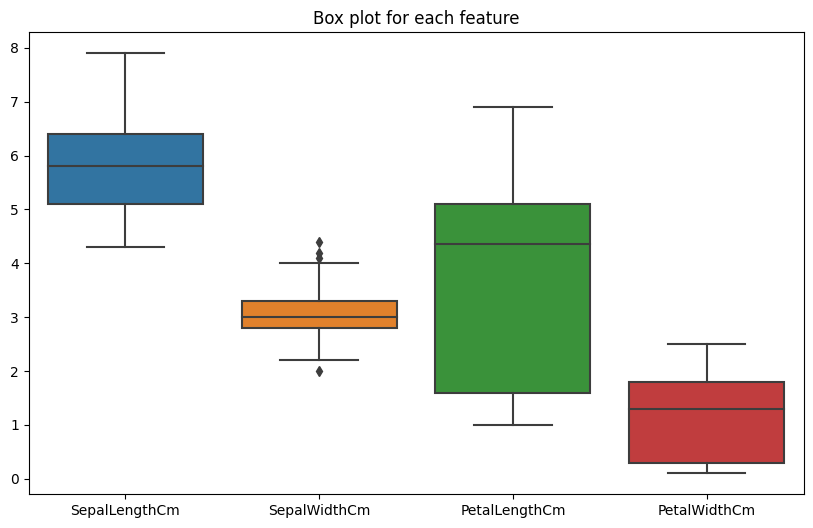

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each pair of features
sns.pairplot(iris_data, hue="Species", markers=["o", "s", "D"])
plt.suptitle("Scatter plot for each pair of features", y=1.02)  # Adjust title position
plt.show()

# Box plot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data.drop(columns=["Species"]))
plt.title("Box plot for each feature")
plt.show()


## Step 4: K-Means Clustering

In [5]:

import numpy as np

def k_means_clustering(data, k=3, max_iterations=100, tolerance=0.0001):
    # Randomly initializing k centroids
    centroids = data.sample(n=k).to_numpy()

    for i in range(max_iterations):
        # Assigning clusters
        distances = np.array([np.linalg.norm(data.to_numpy() - centroid, axis=1) for centroid in centroids])
        closest_cluster = np.argmin(distances, axis=0)

        # Updating centroids
        new_centroids = np.array([data.iloc[closest_cluster == j].mean().to_numpy() for j in range(k)])

        # Checking for convergence (if centroids do not change significantly)
        if np.all(np.linalg.norm(new_centroids - centroids) < tolerance):
            break

        centroids = new_centroids

    return closest_cluster, centroids

# Dropping the 'Species' column for clustering
iris_features = iris_data.drop(columns=['Species'])

# Performing K-Means Clustering
clusters, centroids = k_means_clustering(iris_features)

# Adding cluster labels to the data
iris_data['Cluster'] = clusters
iris_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


## Step 5: Gaussian Mixture Models (GMM)

In [6]:

from sklearn.mixture import GaussianMixture

# Fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_clusters = gmm.fit_predict(iris_features)

# Adding GMM cluster labels to the data
iris_data['GMM_Cluster'] = gmm_clusters
iris_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,GMM_Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2,0
1,4.9,3.0,1.4,0.2,Iris-setosa,2,0
2,4.7,3.2,1.3,0.2,Iris-setosa,2,0
3,4.6,3.1,1.5,0.2,Iris-setosa,2,0
4,5.0,3.6,1.4,0.2,Iris-setosa,2,0


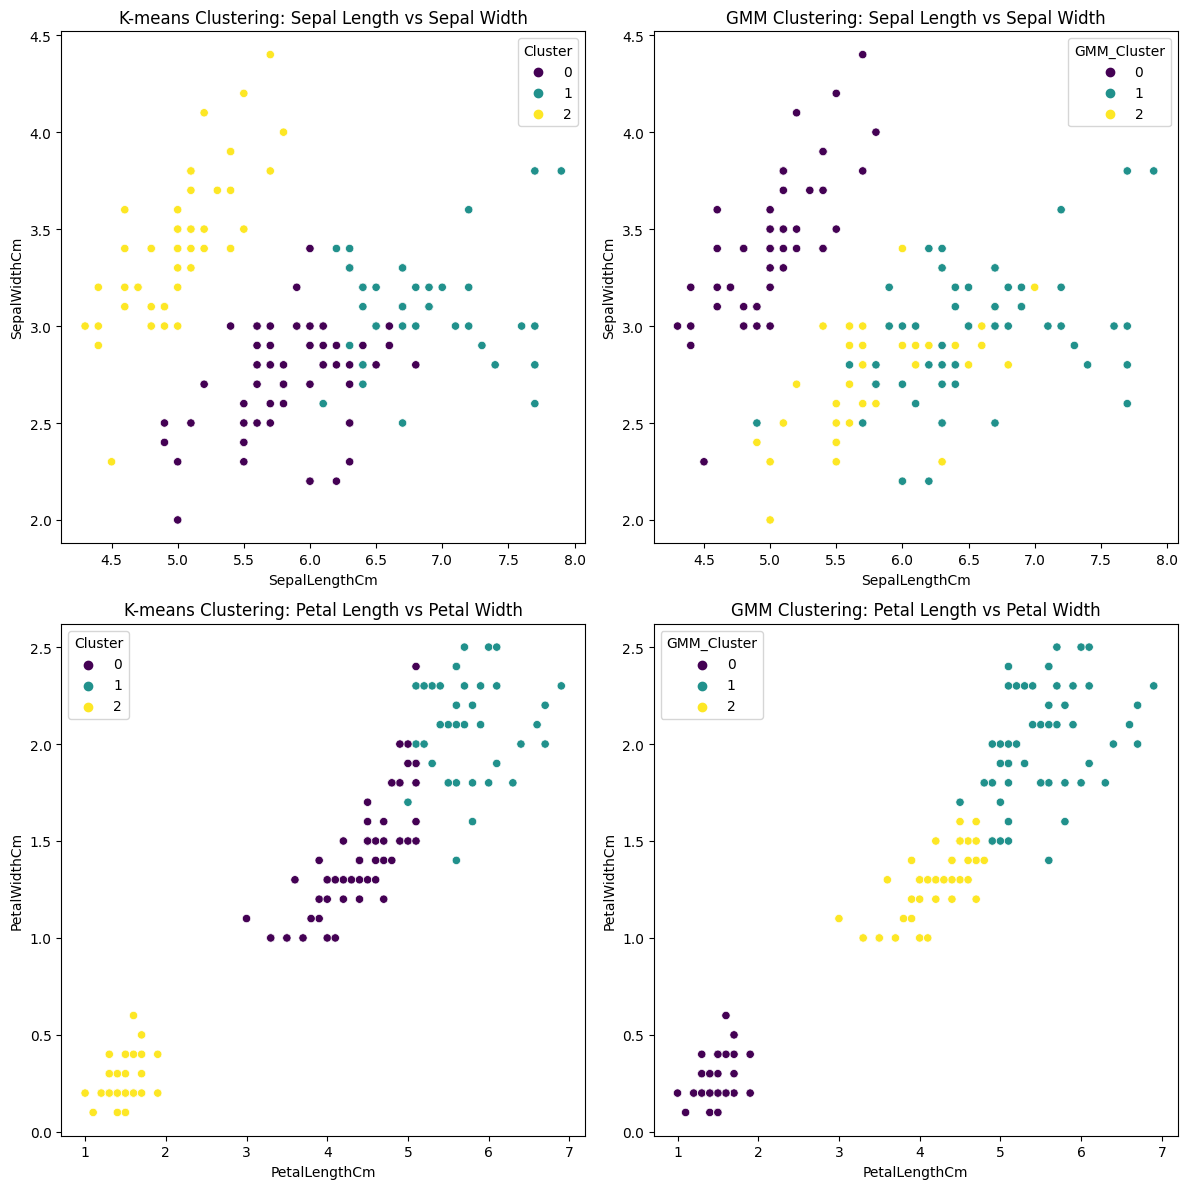

In [8]:
# Setting up the figure for multiple subplots
plt.figure(figsize=(12, 12))

# Sepal Length vs Sepal Width
# K-means Clustering
plt.subplot(2, 2, 1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=iris_data, palette='viridis')
plt.title('K-means Clustering: Sepal Length vs Sepal Width')

# GMM Clustering
plt.subplot(2, 2, 2)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='GMM_Cluster', data=iris_data, palette='viridis')
plt.title('GMM Clustering: Sepal Length vs Sepal Width')

# Petal Length vs Petal Width
# K-means Clustering
plt.subplot(2, 2, 3)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=iris_data, palette='viridis')
plt.title('K-means Clustering: Petal Length vs Petal Width')

# GMM Clustering
plt.subplot(2, 2, 4)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='GMM_Cluster', data=iris_data, palette='viridis')
plt.title('GMM Clustering: Petal Length vs Petal Width')

# Adjust layout
plt.tight_layout()
plt.show()
